# CTR simulation, UCB algorithm

### setup

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#function for generating distributions
def gen_dist(tuple, n):
    return np.random.beta(tuple[0], tuple[1], size = (n,1))

In [3]:
#find the distribution with highest 95th percentile
def UCB_decision(list):
    d = {np.percentile(gen_dist(i, 10000), 95): i for i in list}
    
    return d[max(d.keys())]

In [4]:
#randomly draw click or no click and update the distribution
def update_prior(list):
    best_dist = UCB_decision(list)[2]
    incr = (np.random.uniform(0,1,1) < eval('ad_' + best_dist + '_CTR'))
    eval('ad_' + best_dist + '_post_dist')[0] += incr
    eval('ad_' + best_dist + '_post_dist')[1] +=  (1-incr)
    return eval('ad_' + best_dist + '_post_dist')
    

### Define variables

In [9]:
#true CTRs
ad_a_CTR = 0.070
ad_b_CTR = 0.020
ad_c_CTR = 0.060

#prior distributions
ad_a_prior_par = ([80, 1000, 'a'])
ad_b_prior_par = ([90, 1000, 'b'])
ad_c_prior_par = ([120, 1000, 'c'])

#posterior distributions that will be updated
ad_a_post_dist = ([80, 1000, 'a'])
ad_b_post_dist = ([90, 1000, 'b'])
ad_c_post_dist = ([120, 1000, 'c'])

### Simulation

In [ ]:
#update the prior distributions
impressions = 10000
for i in range(impressions):
    update_prior([ad_a_post_dist, ad_b_post_dist, ad_c_post_dist])

### Results

In [38]:
#compare prior and posterior
print('Prior distribution of CTR of ad %s is Beta(%d, %d)'
      %(ad_a_prior_par[2], ad_a_prior_par[0], ad_a_prior_par[1]))
print('Prior distribution of CTR of ad %s is Beta(%d, %d)'
      %(ad_b_prior_par[2], ad_b_prior_par[0], ad_b_prior_par[1]))
print('Prior distribution of CTR of ad %s is Beta(%d, %d)'
      %(ad_c_prior_par[2], ad_c_prior_par[0], ad_c_prior_par[1]))
print('Posterior distribution of CTR of ad %s is Beta(%d, %d)'
      %(ad_a_post_dist[2], ad_a_post_dist[0], ad_a_post_dist[1]))
print('Posterior distribution of CTR of ad %s is Beta(%d, %d)'
      %(ad_b_post_dist[2], ad_b_post_dist[0], ad_b_post_dist[1]))
print('Posterior distribution of CTR of ad %s is Beta(%d, %d)'
      %(ad_c_post_dist[2], ad_c_post_dist[0], ad_c_post_dist[1]))


Prior distribution of CTR of ad a is Beta(80, 1000)
Prior distribution of CTR of ad b is Beta(90, 1000)
Prior distribution of CTR of ad c is Beta(120, 1000)
Posterior distribution of CTR of ad a is Beta(331, 4419)
Posterior distribution of CTR of ad b is Beta(99, 1455)
Posterior distribution of CTR of ad c is Beta(485, 6501)


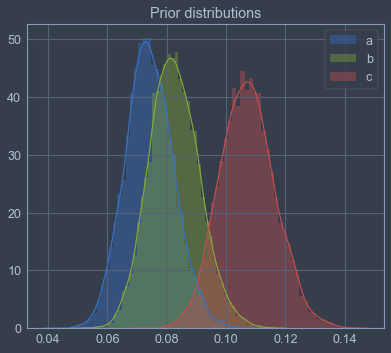

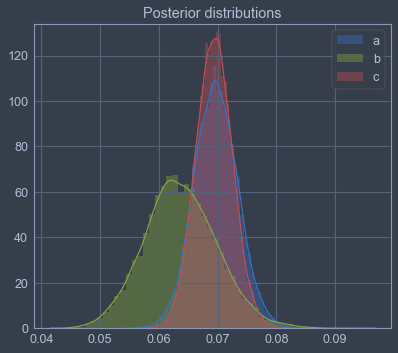

In [41]:
import jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sns.distplot(np.sort(gen_dist(ad_a_prior_par, 10000)), label = 'a')
sns.distplot(np.sort(gen_dist(ad_b_prior_par, 10000)), label = 'b')
sns.distplot(np.sort(gen_dist(ad_c_prior_par, 10000)), label = 'c')
plt.legend()
plt.title('Prior distributions')
plt.show()

sns.distplot(np.sort(gen_dist(ad_a_post_dist, 10000), axis =0), label = 'a')
sns.distplot(np.sort(gen_dist(ad_b_post_dist, 10000), axis = 0), label = 'b')
sns.distplot(np.sort(gen_dist(ad_c_post_dist, 10000), axis = 0), label = 'c')
plt.legend()
plt.title('Posterior distributions')
plt.show()